# Seleccionar idioma

In [344]:
idioma = 'english'

# Importar Librerias

In [345]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2021-04-02


In [346]:
import nltk; 
#nltk.download('stopwords')
import time


In [347]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from string import digits
from string import punctuation
import unidecode


In [348]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [349]:
import spacy


In [350]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [351]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [352]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [353]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words(idioma)
stop_words.extend(['linkremoved','amp', 'usernameremoved','link','removed', '<usernameremoved>','<linkremoved>','usernameremoved_usernameremoved','linkremoved_linkremoved'])
##stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [354]:
#stopwords

# Importar datos

In [355]:
df = pd.read_csv('../Airline tweets/airlines_tweets_with_sentiment_data.csv',encoding='utf-8')

In [356]:
len(df)

10560

In [357]:
df.head()

,Unnamed: 0,created_at,tweet_id,id_str,text_x,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count_y,text_y,tweet_coord,tweet_created,tweet_location,user_timezone
0,0,Tue Feb 24 17:04:10 +0000 2015,570267956648792064,570267956648792064,@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'VirginAmerica', 'name': 'Virgin America', 'id': 12101862, 'id_str': '12101862', 'indices': [0, 14]}], 'urls': []}","<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",NaN,NaN,...,Virgin America,NaN,JNLpierce,NaN,0,@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,NaN,2015-02-24 09:04:10 -0800,Boston | Waltham,Quito
1,1,Tue Feb 24 16:49:01 +0000 2015,570264145116819457,570264145116819457,@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'VirginAmerica', 'name': 'Virgin America', 'id': 12101862, 'id_str': '12101862', 'indices': [0, 14]}], 'urls': [], 'media': [{'id': 570264144403759104, 'id_str': '570264144403759104', 'indices': [36, 58], 'media_url': 'http://pbs.twimg.com/media/B-n8N8tUAAAJcel.jpg', 'media_url_https': 'https://pbs.twimg.com/media/B-n8N8tUAAAJcel.jpg', 'url': 'http://t.co/UT5GrRwAaA', 'display_url': 'pic.twitter.com/UT5GrRwAaA', 'expanded_url': 'https://twitter.com/DT_Les/status/570264145116819457/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 640, 'h': 377, 'resize': 'fit'}, 'small': {'w': 640, 'h': 377, 'resize': 'fit'}, 'large': {'w': 640, 'h': 377, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,Virgin America,NaN,DT_Les,NaN,0,@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA,"[40.74804263, -73.99295302]",2015-02-24 08:49:01 -0800,NaN,NaN
2,2,Tue Feb 24 00:08:07 +0000 2015,570012257549070337,570012257549070337,@VirginAmerica I'm #elevategold for a good reason: you rock!!,False,"{'hashtags': [{'text': 'elevategold', 'indices': [19, 31]}], 'symbols': [], 'user_mentions': [{'screen_name': 'VirginAmerica', 'name': 'Virgin America', 'id': 12101862, 'id_str': '12101862', 'indices': [0, 14]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",5.699362e+17,5.699362e+17,...,Virgin America,NaN,arieldaie,NaN,0,@VirginAmerica I'm #elevategold for a good reason: you rock!!,NaN,2015-02-23 16:08:07 -0800,Los Angeles,NaN
3,3,Tue Feb 24 19:13:57 +0000 2015,570300616901320704,570300616901320704,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'VirginAmerica', 'name': 'Virgin America', 'id': 12101862, 'id_str': '12101862', 'indices': [0, 14]}], 'urls': []}","<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",5.702999e+17,5.702999e+17,...,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
4,4,Mon Feb 23 21:30:10 +0000 2015,569972508499283968,569972508499283968,@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'VirginAmerica', 'name': 'Virgin America', 'id': 12101862, 'id_str': '12101862', 'indices': [0, 14]}, {'screen_name': 'Travelzoo', 'name': 'Travelzoo', 'id': 14825399, 'id_str': '14825399', 'indices': [39, 49]}], 'urls': [{'url': 'http://t.co/kj1iljaebV', 'expanded_url': 'http://www.travelzoo.com/tzoos/html/winners.html', 'display_url': 'travelzoo.com/tzoos/ht

In [358]:
df = df[['airline_sentiment', 'text_x', 'text_y']]
df.drop_duplicates(inplace=True)
len(df)

10259

In [249]:
df['airline_sentiment'].value_counts()

negative    6421
neutral     2126
positive    1712
Name: airline_sentiment, dtype: int64

# Considerar solo algunos tweets


In [254]:
df = df.loc[(df['airline_sentiment'] == 'positive') | (df['airline_sentiment'] == 'neutral')]

In [255]:
len(df)

3838

**Se usará la columna 'texto completo' para extraer los datos de los tweets**

In [256]:
pd.set_option('display.max_colwidth', -1)
df['texto_completo'] =  df['text_x'].str.lower()
df.head(10)

,airline_sentiment,text_x,text_y,texto_completo
0,positive,@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,@virginamerica you know what would be amazingly awesome? bos-fll please!!!!!!! i want to fly with only you.
1,positive,@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA,@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA,@virginamerica i love this graphic. http://t.co/ut5grrwaaa
2,positive,@VirginAmerica I'm #elevategold for a good reason: you rock!!,@VirginAmerica I'm #elevategold for a good reason: you rock!!,@virginamerica i'm #elevategold for a good reason: you rock!!
3,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)","@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)","@virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :)"
4,positive,@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV,@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV,@virginamerica congrats on winning the @travelzoo award for best deals from an airline (us) http://t.co/kj1iljaebv
9,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@virginamerica really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp"
10,neutral,@VirginAmerica plz help me win my bid upgrade for my flight 2/27 LAX---&gt;SEA!!! 🍷👍💺✈️,@VirginAmerica plz help me win my bid upgrade for my flight 2/27 LAX---&gt;SEA!!! 🍷👍💺✈️,@virginamerica plz help me win my bid upgrade for my flight 2/27 lax---&gt;sea!!! 🍷👍💺✈️
11,neutral,Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,nice rt @virginamerica: vibe with the moodlight from takeoff to touchdown. #moodlitmonday #sciencebehindtheexperience http://t.co/y7o0unxtqp
12,positive,@VirginAmerica I've applied more then once to be a member of the #inflight crew team...Im 100% interested. #flightattendant #dreampath -G,@VirginAmerica I've applied more then once to be a member of the #inflight crew team...Im 100% interested. #flightattendant #dreampath -G,@virginamerica i've applied more then once to be a member of the #inflight crew team...im 100% interested. #flightattendant #dreampath -g
13,neutral,@VirginAmerica Will flights be leaving Dallas for LA on February 24th?,@VirginAmerica Will flights be leaving Dallas for LA on February 24th?,@virginamerica will flights be leaving dallas for la on february 24th?


# remove links

In [257]:
df['texto_completo'].replace({"http\S+": '<linkremoved>'}, inplace=True, regex=True)


In [258]:
df['texto_completo'].replace({"<link removed>": '<linkremoved>'}, inplace=True, regex=True)



In [259]:
df['texto_completo'].head()

0    @virginamerica you know what would be amazingly awesome? bos-fll please!!!!!!! i want to fly with only you.
1    @virginamerica i love this graphic. <linkremoved>                                                          
2    @virginamerica i'm #elevategold for a good reason: you rock!!                                              
3    @virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :)                            
4    @virginamerica congrats on winning the @travelzoo award for best deals from an airline (us) <linkremoved>  
Name: texto_completo, dtype: object

# remove usernames

In [260]:
df['texto_completo'].replace({"@[^\s]+": '<usernameremoved>'}, inplace=True, regex=True)

# remove duplicates

In [261]:
len(df)

3838

In [262]:
df.drop_duplicates(['texto_completo'],keep='first', inplace=True)

In [263]:
print("El numero de tweets no duplicados es", len(df)) #numero de tweets no duplicados

El numero de tweets no duplicados es 3740


In [264]:
# numero de usuarios
#tweets_by_user_data = df.groupby('user.screen_name').agg('size').sort_values(ascending=False).reset_index()
#print("El numero de usuarios es",len(tweets_by_user_data))

# remove digits, puntuactions, symbols

In [265]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [266]:
punctuation+='¡¿'

In [267]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¡¿'

In [268]:
#Remove digits and puntuaction
remove_digits = str.maketrans(digits, ' '*len(digits))#remove_digits = str.maketrans('', '', digits)
remove_punctuation = str.maketrans(punctuation, ' '*len(punctuation))#remove_punctuation = str.maketrans('', '', punctuation)
remove_hashtags_caracter = str.maketrans('#', ' '*len('#'))
#las palabras de los hashtag se mantiene, pero no el simbolo. 

In [269]:
df['texto_completo'].head()

0    <usernameremoved> you know what would be amazingly awesome? bos-fll please!!!!!!! i want to fly with only you.     
1    <usernameremoved> i love this graphic. <linkremoved>                                                               
2    <usernameremoved> i'm #elevategold for a good reason: you rock!!                                                   
3    <usernameremoved> yes, nearly every time i fly vx this “ear worm” won’t go away :)                                 
4    <usernameremoved> congrats on winning the <usernameremoved> award for best deals from an airline (us) <linkremoved>
Name: texto_completo, dtype: object

In [270]:
#df['texto_completo'].replace({"ee.uu": 'eeuu'}, inplace=True, regex=True)


In [271]:
#a = df[df['texto_completo'].str.contains('ee.uu', regex = True)]

In [272]:
#len(a)+51

# Ojo, en Topic modeling no remuevo tildes. Solo lo hago en word embeddings

In [273]:
import unidecode

data = []
for tweet in df['texto_completo']:
    tweet = tweet.translate(remove_digits)
    #tweet = tweet.lower() it wasn't a good idea,, we lost a lot of
    tweet = tweet.translate(remove_punctuation)
    tweet = tweet.translate(remove_hashtags_caracter)
    tweet = tweet.lower()
    #tweet = unidecode.unidecode(tweet)  #esta linea se hacia en word embeddings
    #tweet = tweet.strip().split()
    #filtered_words = [word for word in tweet if word not in stopWords]
    #corpus[id_tweet]= filtered_words
    #id_tweet+=1
    data.append(tweet)


In [274]:
data[0:5]

[' usernameremoved  you know what would be amazingly awesome  bos fll please        i want to fly with only you ',
 ' usernameremoved  i love this graphic   linkremoved ',
 ' usernameremoved  i m  elevategold for a good reason  you rock  ',
 ' usernameremoved  yes  nearly every time i fly vx this “ear worm” won’t go away   ',
 ' usernameremoved  congrats on winning the  usernameremoved  award for best deals from an airline  us   linkremoved ']

In [275]:
len(data)

3740

In [276]:
len(df)

3740

In [277]:
pprint(data[1])

' usernameremoved  i love this graphic   linkremoved '


#  Twitter tokenizer

In [278]:
from nltk.tokenize import TweetTokenizer

In [279]:
tknzr = TweetTokenizer()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(tknzr.tokenize(sentence))


In [280]:
data_words = list(sent_to_words(data))
#0:27

In [281]:
print(data_words[1])

['usernameremoved', 'i', 'love', 'this', 'graphic', 'linkremoved']


In [282]:
print(data_words[4])

['usernameremoved', 'congrats', 'on', 'winning', 'the', 'usernameremoved', 'award', 'for', 'best', 'deals', 'from', 'an', 'airline', 'us', 'linkremoved']


In [283]:
print(data_words[5])

['usernameremoved', 'really', 'missed', 'a', 'prime', 'opportunity', 'for', 'men', 'without', 'hats', 'parody', 'there', 'linkremoved']


# Create brigram and trigram models

In [284]:
# Build the bigram and trigram models
#quizas el min count es muy bajo
#documentaicon de bigramas 
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#3importpackages
min_count = 5#int(len(df)*0.03)
bigram = gensim.models.Phrases(data_words, min_count=min_count) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], min_count =min_count)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['usernameremoved', 'i', 'love', 'this', 'graphic', 'linkremoved']


In [285]:
# See trigram example
#print(trigram_mod[bigram_mod[data_words[1]]])
for i in range(0,5):
    print(trigram_mod[bigram_mod[data_words[i]]])

['usernameremoved', 'you', 'know_what', 'would_be', 'amazingly', 'awesome', 'bos', 'fll', 'please', 'i_want', 'to', 'fly', 'with', 'only', 'you']
['usernameremoved', 'i', 'love', 'this', 'graphic', 'linkremoved']
['usernameremoved', 'i_m', 'elevategold', 'for', 'a', 'good', 'reason', 'you', 'rock']
['usernameremoved', 'yes', 'nearly', 'every_time', 'i', 'fly', 'vx', 'this', '“', 'ear', 'worm', '”', 'won', '’_t', 'go', 'away']
['usernameremoved', 'congrats', 'on', 'winning', 'the', 'usernameremoved', 'award', 'for', 'best', 'deals', 'from', 'an', 'airline', 'us', 'linkremoved']


# Remove Stopwords, Make Bigrams and Lemmatize

In [286]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [287]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [288]:
#%pprint

In [289]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)#0:33


In [290]:
data_words_nostops[0]

['know',
 'would',
 'amazingly',
 'awesome',
 'bos',
 'fll',
 'please',
 'want',
 'fly']

In [291]:
#%pprint


In [292]:
data_words_nostops[0:10]

[['know',
  'would',
  'amazingly',
  'awesome',
  'bos',
  'fll',
  'please',
  'want',
  'fly'],
 ['love', 'graphic'],
 ['elevategold', 'good', 'reason', 'rock'],
 ['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'go', 'away'],
 ['congrats', 'winning', 'award', 'best', 'deals', 'airline', 'us'],
 ['really',
  'missed',
  'prime',
  'opportunity',
  'men',
  'without',
  'hats',
  'parody'],
 ['plz', 'help', 'win', 'bid', 'upgrade', 'flight', 'lax', 'gt', 'sea'],
 ['nice', 'rt', 'vibe', 'moodlight', 'takeoff', 'touchdown', 'moodlitmonday'],
 ['applied',
  'member',
  'inflight',
  'crew',
  'team',
  'im',
  'interested',
  'flightattendant',
  'dreampath'],
 ['flights', 'leaving', 'dallas', 'la', 'february', 'th']]

In [293]:
data_words_nostops[2]

['elevategold', 'good', 'reason', 'rock']

In [294]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Form Trigrams

data_words_trigrams = make_trigrams(data_words_bigrams)


In [295]:
#%pprint
#data_words_trigrams

# Inicializar en el idioma correspondiente

In [296]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
if idioma == 'english':
    !python -m spacy download en_core_web_sm
    print("IDIOMA ACTUAL : ENGLISH")
elif idioma == 'spanish':
    !python -m spacy download es
    print("IDIOMA ACTUAL : SPANISH")
else:
    print("Error!!!!!!!")

IDIOMA ACTUAL : ENGLISH


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gonza\tesisenv\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\gonza\tesisenv\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Program Files\Python39\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Program Files\Python39\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Program Files\Python39\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Program Files\Python39\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Program Files\Python39\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out

During handling of the above exception, another exception occurred:

Traceback (most recent cal

In [297]:
if idioma == 'english':
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("IDIOMA ACTUAL : ENGLISH")
elif idioma == 'spanish':
    nlp = spacy.load('es', disable=['parser', 'ner'])
    print("IDIOMA ACTUAL : SPANISH")
else:
    print("ERROR!!")

IDIOMA ACTUAL : ENGLISH


In [298]:

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#Aqui aparecen la lista de postags disponibles, https://spacy.io/api/annotation solo lematizaremos en una seleccion

print(data_lemmatized[:1])#4:13

[['know', 'would', 'amazingly', 'awesome', 'bos', 'want', 'fly']]


In [299]:
data_lemmatized[:30]

[['know', 'would', 'amazingly', 'awesome', 'bos', 'want', 'fly'],
 [],
 ['elevategold', 'good', 'reason', 'rock'],
 ['nearly', 'fly', 'vx', 'worm', 'go', 'away'],
 ['congrat', 'win', 'award', 'good', 'deal', 'airline'],
 ['really', 'miss', 'prime', 'opportunity', 'man', 'hat', 'parody'],
 ['help', 'win', 'bid', 'upgrade', 'flight', 'lax', 'sea'],
 ['takeoff', 'touchdown'],
 ['member',
  'crew',
  'team',
  'be',
  'interested',
  'flightattendant',
  'dreampath'],
 ['flight', 'leave'],
 ['try', 'check', 'could', 'status'],
 ['happen'],
 ['do', 'do', 'hand'],
 ['dream'],
 ['book'],
 ['know', 'suicide', 'second', 'lead', 'cause', 'death', 'teen'],
 ['flight', 'leave'],
 ['awesome', 'fly', 'sit', 'morning', 'way', 'correct', 'bill'],
 ['email', 'team', 'let', 'know', 'need', 'track', 'number'],
 ['bring', 'reservation', 'online', 'use', 'book', 'code'],
 ['flight', 'redirect'],
 ['watch', 'good', 'student', 'film', 'country', 'foot', 'cmfat', 'foot'],
 ['today', 'must', 'mean', 'need', 't

In [300]:
data_lemmatized[1]

[]

In [301]:
data_lemmatized[9]

['flight', 'leave']

In [302]:
data_lemmatized[:10]

[['know', 'would', 'amazingly', 'awesome', 'bos', 'want', 'fly'],
 [],
 ['elevategold', 'good', 'reason', 'rock'],
 ['nearly', 'fly', 'vx', 'worm', 'go', 'away'],
 ['congrat', 'win', 'award', 'good', 'deal', 'airline'],
 ['really', 'miss', 'prime', 'opportunity', 'man', 'hat', 'parody'],
 ['help', 'win', 'bid', 'upgrade', 'flight', 'lax', 'sea'],
 ['takeoff', 'touchdown'],
 ['member',
  'crew',
  'team',
  'be',
  'interested',
  'flightattendant',
  'dreampath'],
 ['flight', 'leave']]

In [303]:

df['texto_completo'].head(10)

0     <usernameremoved> you know what would be amazingly awesome? bos-fll please!!!!!!! i want to fly with only you.                              
1     <usernameremoved> i love this graphic. <linkremoved>                                                                                        
2     <usernameremoved> i'm #elevategold for a good reason: you rock!!                                                                            
3     <usernameremoved> yes, nearly every time i fly vx this “ear worm” won’t go away :)                                                          
4     <usernameremoved> congrats on winning the <usernameremoved> award for best deals from an airline (us) <linkremoved>                         
9     <usernameremoved> really missed a prime opportunity for men without hats parody, there. <linkremoved>                                       
10    <usernameremoved> plz help me win my bid upgrade for my flight 2/27 lax---&gt;sea!!!  🍷👍💺✈️                     

In [304]:
#from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet') #esto no funciona en español

In [305]:

#lemmatizer = WordNetLemmatizer() 
#def lemmatization_tweets(sentence):
 #   for word in sentence:
  #      yield(lemmatizer.lemmatize(word, pos="v"))


In [306]:
#prueba = list(lemmatization_tweets(data_words_nostops))


In [307]:
#prueba[1]

# Create dictionary and corpus for topic modeling

In [308]:
#The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [309]:
id2word.num_docs #NUMERO DE TWEETS PROCESADOS

3740

In [310]:
print("El vocabulary size es: ",str(len(id2word)))


El vocabulary size es:  3013


(0, 1) above implies, word id 0 occurs once in the first document.

In [311]:
id2word[0]


'amazingly'

In [312]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('amazingly', 1),
  ('awesome', 1),
  ('bos', 1),
  ('fly', 1),
  ('know', 1),
  ('want', 1),
  ('would', 1)]]

# Gensim - Build the topic model 

In [313]:
'''
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
''';

# Gensim - View the topics in LDA model

In [314]:
#pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

# Gensim -  Compute Model Perplexity and Coherence Score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [315]:
# Compute Perplexity
#print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#print('\nCoherence Score: ', coherence_lda)

# Calcular mejor numero de topicos

In [316]:
from gensim.test.utils import common_corpus, common_dictionary

In [317]:
from gensim.models.wrappers import LdaMallet

In [318]:
#Instructions about how to install mallet are available here: http://mallet.cs.umass.edu/download.php

'''
Windows installation: After unzipping MALLET, set the environment variable %MALLET_HOME% to point to the MALLET directory.
In all command line examples, substitute bin\mallet for bin/mallet.
'''
import os
from gensim.models.wrappers import LdaMallet


path_to_mallet_binary = "C:\\mallet-2.0.8\\bin\\mallet"
os.environ.update({'MALLET_HOME':r'C:\mallet-2.0.8'}) #OJO!, por alguna razon mallet solo puede estar disponible en esa carpeta


In [319]:
 
def compute_coherence_values(dictionary, corpus, texts, list_num_topics,window_size,topn):
    print("NUMERO DE TOPICOS A CALCULAR",list_num_topics)
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    #modificar aqui la lista de valores en las que se desea probar
    
    #for num_topics in range(start, limit, step):
    for num_topics in list_num_topics:
        print('num', num_topics)
        model = gensim.models.wrappers.LdaMallet(path_to_mallet_binary, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v', window_size=window_size, topn=topn)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [320]:
start = time.time()
#list_num_topics= [5,8,11,15,20,50, 100]
list_num_topics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#list_num_topics = [4]
topn=20
window_size=110
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, list_num_topics= list_num_topics,window_size = window_size, topn=topn)
#ojo, el numero de start, limit y step no tiene sentido en la linea anterior, se modifican directamente en el algoritmo
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

#04:46


NUMERO DE TOPICOS A CALCULAR [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
num 1
num 2
num 3
num 4
num 5
num 6
num 7
num 8
num 9
num 10
num 11
num 12
num 13
num 14
num 15
00:14:20.82


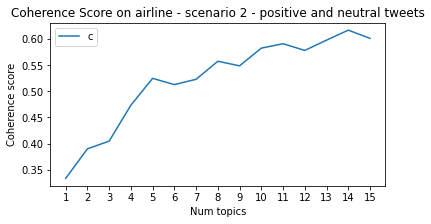

In [326]:
# Show graph

#x = range(start, limit, step)

x = list_num_topics
plt.figure(figsize=(6,3))
plt.title("Coherence Score on airline - scenario 2 - positive and neutral tweets")
plt.plot(x, coherence_values)


plt.xlabel("Num topics")
plt.ylabel("Coherence score")
plt.xticks(x, x)

plt.legend(("coherence_values"), loc='best')
plt.show()

In [322]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3336
Num Topics = 2  has Coherence Value of 0.39
Num Topics = 3  has Coherence Value of 0.4048
Num Topics = 4  has Coherence Value of 0.4735
Num Topics = 5  has Coherence Value of 0.5247
Num Topics = 6  has Coherence Value of 0.5128
Num Topics = 7  has Coherence Value of 0.523
Num Topics = 8  has Coherence Value of 0.5574
Num Topics = 9  has Coherence Value of 0.5487
Num Topics = 10  has Coherence Value of 0.5825
Num Topics = 11  has Coherence Value of 0.591
Num Topics = 12  has Coherence Value of 0.5781
Num Topics = 13  has Coherence Value of 0.5978
Num Topics = 14  has Coherence Value of 0.6169
Num Topics = 15  has Coherence Value of 0.6011


In [327]:
#save information for later
dict_models = dict()
dict_models['model_list'] = model_list
dict_models['coherence_values'] = coherence_values



In [328]:
import pickle


with open('coherence_and_model_lists_airlines_data_scenario_2_positive_neutral_tweets.pkl', 'wb') as handle:
    pickle.dump(dict_models, handle, protocol=4)

In [215]:
#coherence_and_model_lists_airlines_data_scenario_1.pkl
'''
with open('coherence_and_model_lists_airlines_data_scenario_1.pkl', 'rb') as handle:
    dict_models = pickle.load(handle)
''';

# Seleccionar el mejor modelo de los ya realizados

In [335]:
#lda_positive_tweets = dict_models['model_list'][4]

In [330]:
#lda_negative_tweets = dict_models['model_list'][5]

### Visualize topics with PyLDAvis

In [331]:
prueba = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)


In [332]:
pyLDAvis.enable_notebook()


In [333]:
vis = pyLDAvis.gensim.prepare(prueba, corpus,id2word, mds='pcoa', sort_topics=False, R=30)


In [334]:
pyLDAvis.display(vis)

# Visualize results using TopicVisExplorer

## Scenario 1

### Get most relevant documents

In [109]:
lda_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [110]:
#with this code we get the full matrix of topic-documents contribution
matrix_documents_topic_contribution, _ = lda_model.inference(corpus)
matrix_documents_topic_contribution /= matrix_documents_topic_contribution.sum(axis=1)[:, None]
matrix_documents_topic_contribution = pd.DataFrame(matrix_documents_topic_contribution)
matrix_documents_topic_contribution.head()

,0,1,2,3,4,5
0,0.191358,0.154321,0.154321,0.154321,0.191358,0.154321
1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2,0.172840,0.154321,0.172840,0.172840,0.172840,0.154321
3,0.176101,0.176101,0.157233,0.176101,0.157233,0.157233
4,0.186963,0.148810,0.179895,0.148810,0.168856,0.166667


In [111]:
contents = pd.Series(df['texto_completo']).reset_index(drop=True)

In [112]:
matrix_documents_topic_contribution = pd.concat([matrix_documents_topic_contribution, contents], axis=1)


In [113]:
matrix_documents_topic_contribution.head()

,0,1,2,3,4,5,texto_completo
0,0.191358,0.154321,0.154321,0.154321,0.191358,0.154321,<usernameremoved> you know what would be amazingly awesome? bos-fll please!!!!!!! i want to fly with only you.
1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,<usernameremoved> i love this graphic. <linkremoved>
2,0.172840,0.154321,0.172840,0.172840,0.172840,0.154321,<usernameremoved> i'm #elevategold for a good reason: you rock!!
3,0.176101,0.176101,0.157233,0.176101,0.157233,0.157233,"<usernameremoved> yes, nearly every time i fly vx this “ear worm” won’t go away :)"
4,0.186963,0.148810,0.179895,0.148810,0.168856,0.166667,<usernameremoved> congrats on winning the <usernameremoved> award for best deals from an airline (us) <linkremoved>


### Topic similarity emtric

In [115]:
# Choose the # top keywords and # top documents a considerar en la metrica

topn_terms = 20
topk_documents = 20
relevance_lambda = 0.6 

ruta_word_embedding = '../data/embedding_english_europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.model'
word_embedding_model = gensim.models.Word2Vec.load(ruta_word_embedding)

In [117]:
import sys
sys.path.insert(0,'..')


In [118]:
import topicvisexplorer
import importlib
warnings.filterwarnings('ignore')
importlib.reload(topicvisexplorer)

vis = topicvisexplorer.TopicVisExplorer("borrar_nombre")
#calculating topic similarity matrix
topic_similarity_matrix = vis.calculate_topic_similarity_on_single_corpus(word_embedding_model, lda_model, corpus, id2word, matrix_documents_topic_contribution,topn_terms, topk_documents, relevance_lambda)


we are calculating a new topic similarity matirx
Using Prepared Data script - sort_topics False
Calculating for different omegas


In [119]:
#preparing the visualization
vis.prepare_single_corpus( lda_model, corpus, id2word, matrix_documents_topic_contribution, topic_similarity_matrix)


In [121]:
#save data
#For scenario1: ../models_output/single_corpus_airlines_dataset.pkl


vis.save_single_corpus_data("../models_output/single_corpus_airlines_dataset.pkl")

Single corpus data saved sucessfully


In [122]:
#vis.load_single_corpus_data("models_output/single_corpus_europe_cambridge_analytica_lda_mallet_gensim_new_prepared_data_enero_11.pkl")
vis.load_single_corpus_data("../models_output/single_corpus_airlines_dataset.pkl")


Data loaded sucessfully


In [123]:
vis.run()

 * Serving Flask app "borrar_nombre" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


2021-04-01 18:26:32,390 : INFO :  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
2021-04-01 18:26:37,833 : ERROR : Exception on /singlecorpus [GET]
Traceback (most recent call last):
  File "c:\users\gonza\tesisenv\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\gonza\tesisenv\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\gonza\tesisenv\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\gonza\tesisenv\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\gonza\tesisenv\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\gonza\tesisenv\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_arg

Estoy en la funcion single corpuuuus
